<a href="https://colab.research.google.com/github/Sreetam/Gold/blob/main/Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://github.com/Sreetam/Gold/raw/main/Gold.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)
df.set_index("Date", inplace=True)
sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(np.array([df['Close'].values]).T).T[0]
data_len = data.shape[0]
features = []
labels = []
for i in range(100, data_len):
    features.append(data[i-100:i])
    labels.append(data[i])

X = np.array(features)
y = np.array(labels)

# X = np.reshape(features, (features.shape[0], features.shape[1], 2))
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.27, shuffle=False)

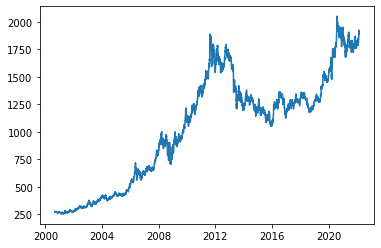

In [42]:
# plt.figure(figsize=(10, 6))
plt.plot(df["Close"])

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units = 25, return_sequences = True, input_shape = (X.shape[1],1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 25, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 25, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 25, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 25, return_sequences = True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units = 25),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=["accuracy"])
history = model.fit(X, y, epochs = 7, batch_size = 64, verbose = 1)

Epoch 1/7
122/122 [==============================] - 32s 138ms/step - loss: 0.0209 - accuracy: 2.5803e-04
Epoch 2/7
122/122 [==============================] - 17s 138ms/step - loss: 0.0048 - accuracy: 2.5803e-04
Epoch 3/7
122/122 [==============================] - 17s 139ms/step - loss: 0.0041 - accuracy: 2.5803e-04
Epoch 4/7
122/122 [==============================] - 17s 138ms/step - loss: 0.0043 - accuracy: 2.5803e-04
Epoch 5/7
122/122 [==============================] - 17s 138ms/step - loss: 0.0034 - accuracy: 2.5803e-04
Epoch 6/7
122/122 [==============================] - 17s 138ms/step - loss: 0.0034 - accuracy: 2.5803e-04
Epoch 7/7
122/122 [==============================] - 17s 137ms/step - loss: 0.0032 - accuracy: 2.5803e-04


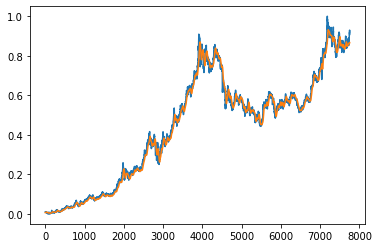

In [41]:
y_pred = model.predict(X)
# plt.figure(figsize=(15, 10))
plt.plot(y)
plt.plot(y_pred.T[0])

In [92]:
price = []
ind = X[len(X) - 1]
for i in range(50):
  pred = model.predict(np.reshape(ind, (1, len(ind))))
  price.append(pred[0][0])
  ind = np.append(ind[1:], pred)

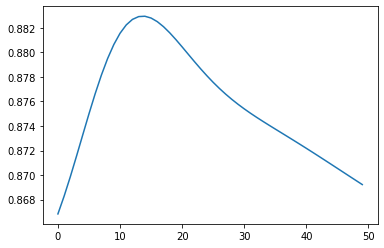

In [93]:
plt.plot(price)